In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

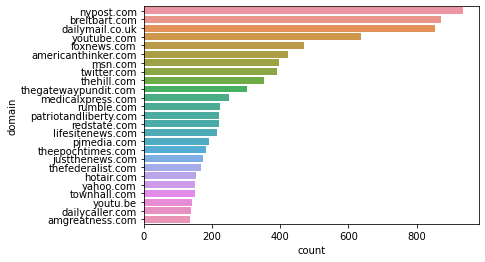

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

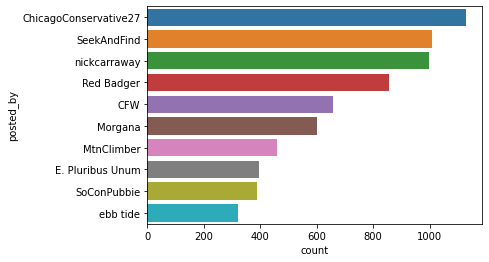

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  CFW                        6      1   
                     ChicagoConservative27      1      1   
                     E. Pluribus Unum          11      1   
                     MtnClimber               183      1   
                     Red Badger                 3      1   
                     SeekAndFind              178      1   
                     SoConPubbie                1      1   
amgreatness.com      CFW                        7      1   
                     E. Pluribus Unum           7      1   
                     MtnClimber                75      1   
                     Red Badger                 1      1   
                     SeekAndFind               12      1   
                     SoConPubbie                5      1   
breitbart.com        CFW                       13      1   
                     ChicagoConservative27    495      1   
                     E. Pluribus Unum          25      1   
                     Red Badger                 7      1   
                     SoConPubbie              109      1   
                     Morgana                   22      1   
                     ebb tide                   1      1   
dailycaller.com      CFW                       17      1   
                     MtnClimber                 2      1   
                     Red Badger                36      1   
                     SeekAndFind                5      1   
                     SoConPubbie                1      1   
dailymail.co.uk      CFW                       23      1   
                     ChicagoConservative27      3      1   
                     Red Badger                15      1   
                     SeekAndFind                3      1   
                     Morgana                  306      1   
                     nickcarraway              12      1   
foxnews.com          CFW                       47      1   
                     ChicagoConservative27     53      1   
                     E. Pluribus Unum           1      1   
                     MtnClimber                 2      1   
                     Red Badger                 5      1   
                     SeekAndFind                4      1   
                     SoConPubbie                6      1   
                     Morgana                    8      1   
                     ebb tide                   1      1   
                     nickcarraway              27      1   
hotair.com           CFW                        6      1   
                     SeekAndFind              121      1   
justthenews.com      CFW                       75      1   
                     E. Pluribus Unum          32      1   
                     Red Badger                10      1   
                     SeekAndFind                4      1   
lifesitenews.com     Morgana                   58      1   
                     ebb tide                  67      1   
medicalxpress.com    Red Badger                 1      1   
msn.com              CFW                        2      1   
                     ChicagoConservative27      7      1   
                     E. Pluribus Unum           1      1   
                     Red Badger                 2      1   
                     SeekAndFind                7      1   
                     nickcarraway              18      1   
nypost.com           CFW                       22      1   
                     ChicagoConservative27    237      1   
                     E. Pluribus Unum          15      1   
                     Red Badger                 8      1   
                     SeekAndFind                2      1   
                     Morgana                    4      1   
                     nickcarraway             222      1   
pjmedia.com          CFW                        3      1   
                     E.

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
Trump is a hack,2023-04-06 00:45:12,210.0
"BREAKING: Donald Trump to be indicted, will appear in court on Tuesday",2023-06-09 01:53:32,171.0
Trump says he won't debate,2023-04-25 19:44:04,169.0
DeSantis Smacks Back At Trump on Glenn Beck Show: ‘He Turned Over The Country to Fauci’,2023-05-26 00:18:42,166.0
"Andy McCarthy: If Half of ‘Devastating’ Trump Indictment Is True, ‘He’s Toast’ and I Think They Can Prove More than Half",2023-06-10 15:20:27,156.0
DESANTIS DROPS BOMBSHELL ON FLORIDA REAL ESTATE OWNERS!,2023-04-09 01:00:05,156.0
"Hundreds of teenagers flood into downtown Chicago, smashing car windows, prompting police response",2023-04-16 12:00:59,156.0
Jury finds Trump DID sexually abuse E. Jean Carroll in Bergdorf Goodman dressing room in the 1990s: Ex-President is cleared of rape but ordered to pay her $5m damages,2023-05-09 20:17:48,156.0
"FReeper Canteen ~ Tell Us Your Favorite ""Motown"" Songs ~ 07 April 2023",2023-04-07 02:42:05,153.0
